<a href="https://colab.research.google.com/github/axel-sirota/ml_ad_ai_course/blob/main/Classical%20ML/2_Data_Manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Manipulation with Python

© Data Trainers LLC. GPL v 3.0.

Author: Axel Sirota

## Learning Objectives
*In this lesson, we will go over the following:*

- Define what Pandas is and how it relates to data science.
- Manipulate Pandas `DataFrames` and `Series`.
- Filter and sort data using Pandas.
- Manipulate `DataFrame` columns.
- Know how to handle null and missing values.

## Lesson Guide

- [What Is Pandas?](#pandas)
- [Reading Files, Selecting Columns, and Summarizing](#reading-files)
    - [Exercise 1](#exercise-one)
    
    
- [Filtering and Sorting](#filtering-and-sorting)
    - [Exercise 2](#exercise-two)
    
    
- [Renaming, Adding, and Removing Columns](#columns)
- [Handling Missing Values](#missing-values)
    - [Exercise 3](#exercise-three)
    
    
- [Split-Apply-Combine](#split-apply-combine)
    - [Exercise 4](#exercise-four)
    
    
- [Selecting Multiple Columns and Filtering Rows](#multiple-columns)
- [Joining (Merging) DataFrames](#joining-dataframes)
- [OPTIONAL: Other Commonly Used Features](#other-features)
- [OPTIONAL: Other Less Used Features of Pandas](#uncommon-features)
- [Summary](#summary)

<img src="https://www.dropbox.com/scl/fi/9hm0wy5m0yno53wzzpm6g/pandas.jpeg?rlkey=9e9lihl1z70h3hif5jekbldy3&raw=1" align="center"/>

<a id="pandas"></a>

## What Is Pandas?

- **Objective:** Define what Pandas is and how it relates to data science.

Pandas is a Python library that primarily adds two new datatypes to Python: `DataFrame` and `Series`.

- A `Series` is a sequence of items, where each item has a unique label (called an `index`).
- A `DataFrame` is a table of data. Each row has a unique label (the `row index`), and each column has a unique label (the `column index`).
- Note that each column in a `DataFrame` can be considered a `Series` (`Series` index).

> Behind the scenes, these datatypes use the NumPy ("Numerical Python") library. NumPy primarily adds the `ndarray` (n-dimensional array) datatype to Pandas. An `ndarray` is similar to a Python list — it stores ordered data. However, it differs in three respects:
> - Each element has the same datatype (typically fixed-size, e.g., a 32-bit integer).
> - Elements are stored contiguously (immediately after each other) in memory for fast retrieval.
> - The total size of an `ndarray` is fixed.

> Storing `Series` and `DataFrame` data in `ndarray`s makes Pandas faster and uses less memory than standard Python datatypes. Many libraries (such as scikit-learn) accept `ndarray`s as input rather than Pandas datatypes, so we will frequently convert between them.


## Why Pandas is so popular ?
<img src="https://www.dropbox.com/scl/fi/c4v7viow2hg1o99xmk1l1/pandas_stack.png?rlkey=i9tyyf6do9f8dhamxarfof90n&raw=1"  align="center"/>


## Using Pandas

Pandas is frequently used in data science because it offers a large set of commonly used functions, is relatively fast, and has a large community. Because many data science libraries also use NumPy to manipulate data, you can easily transfer data between libraries (as we will often do in this class!).

Pandas is a large library that typically takes a lot of practice to learn. It heavily overrides Python operators, resulting in odd-looking syntax. For example, given a `DataFrame` called `cars` which contains a column `mpg`, we might want to view all cars with mpg over 35. To do this, we might write: `cars[cars['mpg'] > 35]`. In standard Python, this would most likely give a syntax error. (**Challenge:** Using only built-in datatypes, can you define `cars` and `mpg` to make this expression valid?)

Pandas also highly favors certain patterns of use. For example, looping through a `DataFrame` row by row is highly discouraged. Instead, Pandas favors using **vectorized functions** that operate column by column. (This is because each column is stored separately as an `ndarray`, and NumPy is optimized for operating on `ndarray`s.)

Do not be discouraged if Pandas feels overwhelming. Gradually, as you use it, you will become familiar with which methods to use and the "Pandas way" of thinking about and manipulating data.

### Class Methods and Attributes

Pandas `DataFrame`s are Pandas class objects and therefore come with attributes and methods. To access these, follow the variable name with a dot. For example, given a `DataFrame` called `users`:

```
- users.index       # accesses the `index` attribute -- note there are no parentheses. attributes are not callable
- users.head()      # calls the `head` method (since there are open/closed parentheses)
- users.head(10)    # calls the `head` method with parameter `10`, indicating the first 10 rows. this is the same as:
- users.head(n=10)  # calls the `head` method, setting the named parameter `n` to have a value of `10`.
```

We know that the `head` method accepts one parameter with an optional name of `n` because it is in the documentation for that method. Let's see how to view the documentation next.

## First lets import Pandas

In [4]:
# Load Pandas into Python
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

<a id="reading-files"></a>
### Reading Files, Selecting Columns, and Summarizing

In [5]:
%%writefile get_data.sh
mkdir -p data
if [ ! -f data/user.tbl ]; then
  wget -O data/user.tbl https://www.dropbox.com/scl/fi/ie20ab8ekk5ondv7st9ag/user.tbl?rlkey=0y6lbz33dreu8ufusw0sc2kj7&dl=0
fi
if [ ! -f data/drinks.csv ]; then
  wget -O data/drinks.csv https://www.dropbox.com/scl/fi/tkfdy0mq30g2t424hmn5o/drinks.csv?rlkey=jl8r4aw1o7y7b5au8icub20pn&dl=0
fi

if [ ! -f data/ufo.csv ]; then
  wget -O data/ufo.csv https://www.dropbox.com/scl/fi/jfdtcoxw3iujoarrqn4uk/ufo.csv?rlkey=rc55ogsir1dpd9h6kmvecpkif&dl=0
fi


Overwriting get_data.sh


In [6]:
!bash get_data.sh

<3>WSL (10) ERROR: CreateProcessEntryCommon:505: execvpe /bin/bash failed 2
<3>WSL (10) ERROR: CreateProcessEntryCommon:508: Create process not expected to return


In [7]:
import numpy as np
array = np.random.rand(3,3)
print(type(array))
df = pd.DataFrame(array)
df

<class 'numpy.ndarray'>


,0,1,2
0,0.223003,0.281527,0.584365
1,0.833503,0.310125,0.390304
2,0.800957,0.157206,0.784472


In [8]:
df.head

<bound method NDFrame.head of           0         1         2
0  0.223003  0.281527  0.584365
1  0.833503  0.310125  0.390304
2  0.800957  0.157206  0.784472>

In [9]:
!ls data

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [10]:
# using the read_csv method of pandas we read file
users = pd.read_csv(r'C:\Users\atulp\Downloads\Pandas\user.tbl', sep='|')

**Examine the users data.**

In [11]:
# how to get the size of the dtaframe?
users.shape

(943, 5)

In [12]:
users.head(3)          # Print the first 3 rows.

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067


In [13]:
users.head(10)          # Print the first 10 rows.

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [14]:
users.tail()            # Print the last five rows.

,user_id,age,gender,occupation,zip_code
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


In [15]:
users.tail(4)

,user_id,age,gender,occupation,zip_code
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


In [16]:
 # The row index (aka "the row labels" — in this case integers)
users.index

RangeIndex(start=0, stop=943, step=1)

In [17]:
# Column names (which is "an index")
users.columns

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

In [18]:
# Datatypes of each column — each column is stored as an ndarray, which has a datatype
users.dtypes

user_id        int64
age            int64
gender        object
occupation    object
zip_code      object
dtype: object

In [19]:
# Number of rows and columns
users.shape

(943, 5)

In [20]:
print(users.shape[0]) # rows
print(users.shape[1]) #columns

943
5


In [21]:
# All values as a NumPy array
print(users.values)
# print(users.to_numpy())


[[1 24 'M' 'technician' '85711']
 [2 53 'F' 'other' '94043']
 [3 23 'M' 'writer' '32067']
 ...
 [941 20 'M' 'student' '97229']
 [942 48 'F' 'librarian' '78209']
 [943 22 'M' 'student' '77841']]


In [22]:
# Concise summary (including memory usage) — useful to quickly see if nulls exist
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [23]:
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


<br> **Select or index data**<br>
Pandas `DataFrame`s have structural similarities with Python-style lists and dictionaries.  
In the example below, we select a column of data using the name of the column in a similar manner to how we select a dictionary value with the dictionary key.

In [24]:
# Select a column — returns a Pandas Series (essentially an ndarray with an index)
type(users['gender'])

pandas.core.series.Series

In [25]:
# DataFrame columns are Pandas Series.
type(users['age'])

pandas.core.series.Series

In [26]:
# Select one column using the DataFrame attribute.
type(users.gender)
# While a useful shorthand, these attributes only exist
# if the column name has no punctuations or spaces.

pandas.core.series.Series

**Summarize (describe) the data.**<br>
Pandas has a bunch of built-in methods to quickly summarize your data and provide you with a quick general understanding.

In [27]:
# Describe all numeric columns.
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [28]:
# Describe all columns, including non-numeric.
users.describe(include='all')

,user_id,age,gender,occupation,zip_code
count,943.000000,943.000000,943,943,943
unique,NaN,NaN,2,21,795
top,NaN,NaN,M,student,55414
freq,NaN,NaN,670,196,9
mean,472.000000,34.051962,NaN,NaN,NaN
std,272.364951,12.192740,NaN,NaN,NaN
min,1.000000,7.000000,NaN,NaN,NaN
25%,236.500000,25.000000,NaN,NaN,NaN
50%,472.000000,31.000000,NaN,NaN,NaN
75%,707.500000,43.000000,NaN,NaN,NaN


In [29]:
# Describe a single column — recall that "users.gender" refers to a Series.
users.gender.describe() # users['gender'].describe()

count     943
unique      2
top         M
freq      670
Name: gender, dtype: object

In [30]:
# Calculate the mean of the ages.
users.age.std()

12.192739733059032

<Axes: >

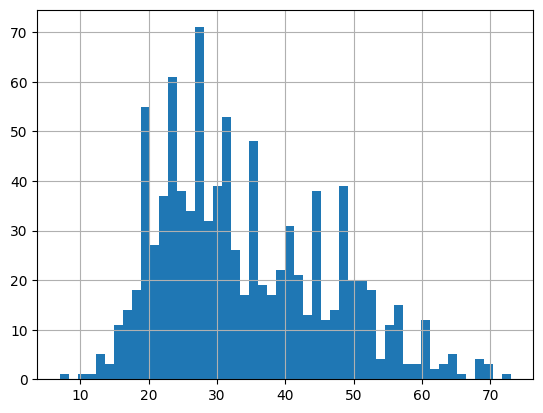

In [31]:
# Draw a histogram of a column (the distribution of ages).
users.age.hist(bins=50)

**Count the number of occurrences of each value.**

In [32]:
users.gender.value_counts()

# Most useful for categorical variables

gender
M    670
F    273
Name: count, dtype: int64

In [371]:
# @title
# Q: How many of each zip codes do we have?
zip_code_pd = users.zip_code.value_counts()

zip_code_pd[zip_code_pd.apply(lambda row: row > 5)]

zip_code
55414    9
55105    6
Name: count, dtype: int64

<Axes: ylabel='count'>

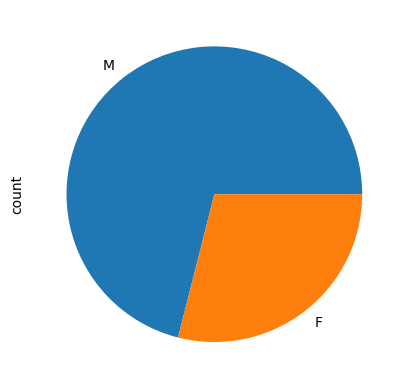

In [34]:
users.gender.value_counts().plot(kind='pie')     # Quick plot by category

In [35]:
# Can also be used with numeric variables
#   Try .sort_index() to sort by indices or .sort_values() to sort by counts.
# Q: What is the most common age?
# print(type(users.age.value_counts()))
print(f'{users.age.value_counts().index[0]} and {users.age.value_counts().max()}')
users.age.value_counts().iloc[0]

30 and 39


39

In [36]:
# Q: What is the lowest age in the dataset?
users.age.min()

7

Text(0.5, 1.0, 'Number of users per age')

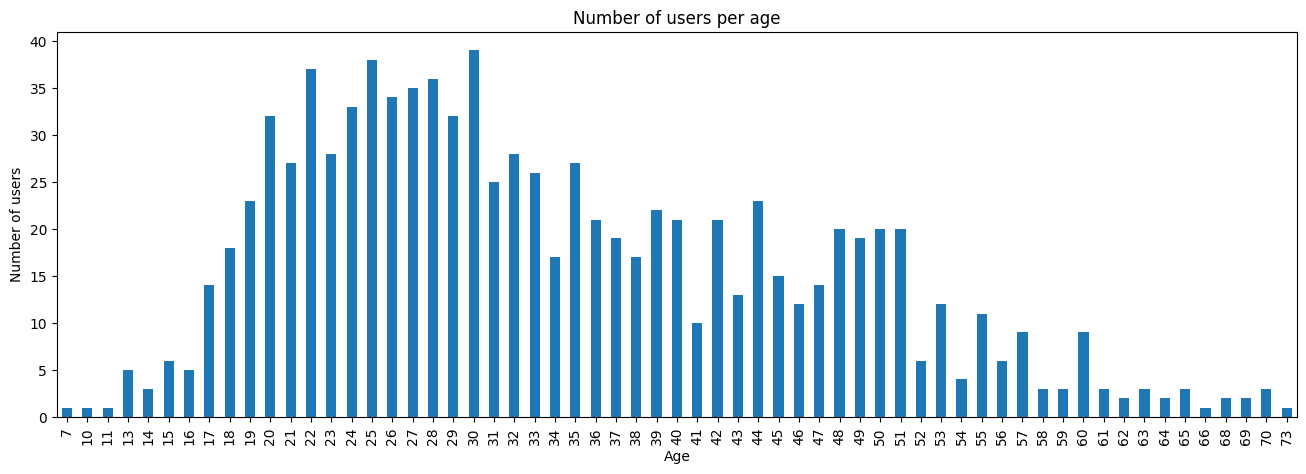

In [37]:
users.age.value_counts().sort_index().plot(kind='bar', figsize=(16,5));     # Bigger plot by increasing age
plt.xlabel('Age')
plt.ylabel('Number of users')
plt.title('Number of users per age')

# Exercise 1
<img src="https://www.dropbox.com/scl/fi/2s9j10tmw3ps899gfajgo/hands_on.jpg?rlkey=53vsb2q2qns4weqkjb0vsvdtz&raw=1" width="100" height="100" align="right"/>



In [38]:
# Read data/drinks.csv into a DataFrame called "drinks".
drinks =  pd.read_csv(r'C:\Users\atulp\Downloads\Pandas\drinks.csv', keep_default_na=False)

In [39]:
# Print the head and the tail.
drinks.head()
drinks.tail()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF
192,Zimbabwe,64,18,4,4.7,AF


In [40]:
# Examine the default index, datatypes, and shape.
drinks.index
drinks.dtypes
drinks.shape

(193, 6)

In [41]:
# Print the beer_servings Series.
drinks.beer_servings


0        0
1       89
2       25
3      245
4      217
      ... 
188    333
189    111
190      6
191     32
192     64
Name: beer_servings, Length: 193, dtype: int64

In [42]:
# Calculate the average beer_servings for the entire data set.
drinks.beer_servings.mean()

106.16062176165804

In [43]:
# Count the number of occurrences of each "continent" value and see if it looks correct.
drinks.continent.value_counts()

continent
AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: count, dtype: int64

In [44]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [45]:
drinks.tail(20)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
173,Tonga,36,21,5,1.1,OC
174,Trinidad & Tobago,197,156,7,6.4,NA
175,Tunisia,51,3,20,1.3,AF
176,Turkey,51,22,7,1.4,AS
177,Turkmenistan,19,71,32,2.2,AS
178,Tuvalu,6,41,9,1.0,OC
179,Uganda,45,9,0,8.3,AF
180,Ukraine,206,237,45,8.9,EU
181,United Arab Emirates,16,135,5,2.8,AS
182,United Kingdom,219,126,195,10.4,EU


<a id="filtering-and-sorting"></a>
### Filtering and Sorting

<img src="https://www.dropbox.com/scl/fi/78qve506a1lsb8uf5c0zm/panda_sort.jpg?rlkey=2car3wlz3jn2jhliv1fnkawyi&raw=1" width="300" height="300" align="right"/>



- **Objective:** Filter and sort data using Pandas.

We can use simple operator comparisons on columns to extract relevant or drop irrelevant information.

In [46]:
users['age'][0]

24

**Logical filtering: Only show users with age < 20.**

In [47]:
# Create a Series of Booleans…
# In Pandas, this comparison is performed element-wise on each row of data.
young_bool = users.age < 20
young_bool

0      False
1      False
2      False
3      False
4      False
       ...  
938    False
939    False
940    False
941    False
942    False
Name: age, Length: 943, dtype: bool

In [48]:
sum(young_bool)

77

In [49]:
# …and use that Series to filter rows.
# In Pandas, indexing a DataFrame by a Series of Booleans only selects rows that are True in the Boolean.
users[young_bool]

users['boolage'] = users.age < 20

users[users['boolage'] == True]

,user_id,age,gender,occupation,zip_code,boolage
29,30,7,M,student,55436,True
35,36,19,F,student,93117,True
51,52,18,F,student,55105,True
56,57,16,M,none,84010,True
66,67,17,M,student,60402,True
...,...,...,...,...,...,...
871,872,19,F,student,74078,True
879,880,13,M,student,83702,True
886,887,14,F,student,27249,True
903,904,17,F,student,61073,True


In [50]:
users['boolage']=users.age < 20
users.head(5)

,user_id,age,gender,occupation,zip_code,boolage
0,1,24,M,technician,85711,False
1,2,53,F,other,94043,False
2,3,23,M,writer,32067,False
3,4,24,M,technician,43537,False
4,5,33,F,other,15213,False


In [51]:
users['custom_column'] = users.age + users.user_id

In [52]:
users

,user_id,age,gender,occupation,zip_code,boolage,custom_column
0,1,24,M,technician,85711,False,25
1,2,53,F,other,94043,False,55
2,3,23,M,writer,32067,False,26
3,4,24,M,technician,43537,False,28
4,5,33,F,other,15213,False,38
...,...,...,...,...,...,...,...
938,939,26,F,student,33319,False,965
939,940,32,M,administrator,02215,False,972
940,941,20,M,student,97229,False,961
941,942,48,F,librarian,78209,False,990


In [53]:
# Or, combine into a single step.
users[users.age < 20]

,user_id,age,gender,occupation,zip_code,boolage,custom_column
29,30,7,M,student,55436,True,37
35,36,19,F,student,93117,True,55
51,52,18,F,student,55105,True,70
56,57,16,M,none,84010,True,73
66,67,17,M,student,60402,True,84
...,...,...,...,...,...,...,...
871,872,19,F,student,74078,True,891
879,880,13,M,student,83702,True,893
886,887,14,F,student,27249,True,901
903,904,17,F,student,61073,True,921


In [54]:
users.columns

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code', 'boolage',
       'custom_column'],
      dtype='object')

In [55]:
users['is_young']=0

In [56]:
users.head()

,user_id,age,gender,occupation,zip_code,boolage,custom_column,is_young
0,1,24,M,technician,85711,False,25,0
1,2,53,F,other,94043,False,55,0
2,3,23,M,writer,32067,False,26,0
3,4,24,M,technician,43537,False,28,0
4,5,33,F,other,15213,False,38,0


In [57]:
# Important: This creates a view of the original DataFrame, not a new DataFrame.
# If you alter this view (e.g., by storing it in a variable and altering that)
# You will alter only the slice of the DataFrame and not the actual DataFrame itself
# Here, notice that Pandas gives you a SettingWithCopyWarning to alert you of this.

# It is best practice to use .loc and .iloc instead of the syntax below

users_under20 = users[users.age < 20].copy()   # To resolve this warning, copy the `DataFrame` using `.copy()`.
users_under20['test'] = 1
users

,user_id,age,gender,occupation,zip_code,boolage,custom_column,is_young
0,1,24,M,technician,85711,False,25,0
1,2,53,F,other,94043,False,55,0
2,3,23,M,writer,32067,False,26,0
3,4,24,M,technician,43537,False,28,0
4,5,33,F,other,15213,False,38,0
...,...,...,...,...,...,...,...,...
938,939,26,F,student,33319,False,965,0
939,940,32,M,administrator,02215,False,972,0
940,941,20,M,student,97229,False,961,0
941,942,48,F,librarian,78209,False,990,0


In [58]:
# Select one column from the filtered results.
users[users.age < 20].occupation

29      student
35      student
51      student
56         none
66      student
         ...   
871     student
879     student
886     student
903     student
924    salesman
Name: occupation, Length: 77, dtype: object

In [59]:
# value_counts of resulting Series
users[users.age < 20].occupation.value_counts()

occupation
student          64
other             4
none              3
entertainment     2
writer            2
artist            1
salesman          1
Name: count, dtype: int64

**Logical filtering with multiple conditions**

In [60]:
# Ampersand for `AND` condition. (This is a "bitwise" `AND`.)
# Important: You MUST put parentheses around each expression because `&` has a higher precedence than `<`.
users[(users.age < 20) & (users.gender=='M')]

,user_id,age,gender,occupation,zip_code,boolage,custom_column,is_young
29,30,7,M,student,55436,True,37,0
56,57,16,M,none,84010,True,73,0
66,67,17,M,student,60402,True,84,0
67,68,19,M,student,22904,True,87,0
100,101,15,M,student,05146,True,116,0
109,110,19,M,student,77840,True,129,0
141,142,13,M,other,48118,True,155,0
178,179,15,M,entertainment,20755,True,194,0
220,221,19,M,student,20685,True,240,0
245,246,19,M,student,28734,True,265,0


In [61]:
# Pipe for `OR` condition. (This is a "bitwise" `OR`.)
# Important: You MUST put parentheses around each expression because `|` has a higher precedence than `<`.
users[(users.age < 20) | (users.age > 60)]

,user_id,age,gender,occupation,zip_code,boolage,custom_column,is_young
29,30,7,M,student,55436,True,37,0
35,36,19,F,student,93117,True,55,0
51,52,18,F,student,55105,True,70,0
56,57,16,M,none,84010,True,73,0
66,67,17,M,student,60402,True,84,0
...,...,...,...,...,...,...,...,...
879,880,13,M,student,83702,True,893,0
886,887,14,F,student,27249,True,901,0
903,904,17,F,student,61073,True,921,0
924,925,18,F,salesman,49036,True,943,0


In [62]:
# Preferred alternative to multiple `OR` conditions

# users[(users['occupation']=='doctor') | (users['occupation']=='lawyer')]
users[users.occupation.isin(['doctor', 'lawyer'])]
users[users.occupation.isin(['lawyer', 'student', 'engineer'])]

,user_id,age,gender,occupation,zip_code,boolage,custom_column,is_young
8,9,29,M,student,01002,False,38,0
9,10,53,M,lawyer,90703,False,63,0
24,25,39,M,engineer,55107,False,64,0
25,26,49,M,engineer,21044,False,75,0
29,30,7,M,student,55436,True,37,0
...,...,...,...,...,...,...,...,...
932,933,28,M,student,48105,False,961,0
933,934,61,M,engineer,22902,False,995,0
938,939,26,F,student,33319,False,965,0
940,941,20,M,student,97229,False,961,0


**Sorting**

In [63]:
# Sort a Series.
users.age.sort_values()

29      7
470    10
288    11
879    13
608    13
       ..
584    69
766    70
802    70
859    70
480    73
Name: age, Length: 943, dtype: int64

In [64]:
# Sort a DataFrame by a single column.
users.sort_values(['age', 'gender'], ascending=False)

,user_id,age,gender,occupation,zip_code,boolage,custom_column,is_young
480,481,73,M,retired,37771,False,554,0
766,767,70,M,engineer,00000,False,837,0
802,803,70,M,administrator,78212,False,873,0
859,860,70,F,retired,48322,False,930,0
558,559,69,M,executive,10022,False,628,0
...,...,...,...,...,...,...,...,...
608,609,13,F,student,55106,True,622,0
673,674,13,F,student,55337,True,687,0
288,289,11,M,none,94619,True,300,0
470,471,10,M,student,77459,True,481,0


In [65]:
# Use descending order instead.
users.sort_values('age', ascending=False)

,user_id,age,gender,occupation,zip_code,boolage,custom_column,is_young
480,481,73,M,retired,37771,False,554,0
802,803,70,M,administrator,78212,False,873,0
766,767,70,M,engineer,00000,False,837,0
859,860,70,F,retired,48322,False,930,0
584,585,69,M,librarian,98501,False,654,0
...,...,...,...,...,...,...,...,...
879,880,13,M,student,83702,True,893,0
608,609,13,F,student,55106,True,622,0
288,289,11,M,none,94619,True,300,0
470,471,10,M,student,77459,True,481,0


In [66]:
# Sort by multiple columns.
users.sort_values(['occupation', 'age'])

,user_id,age,gender,occupation,zip_code,boolage,custom_column,is_young
117,118,21,M,administrator,90210,False,139,0
179,180,22,F,administrator,60202,False,202,0
281,282,22,M,administrator,20057,False,304,0
316,317,22,M,administrator,13210,False,339,0
438,439,23,F,administrator,20817,False,462,0
...,...,...,...,...,...,...,...,...
547,548,51,M,writer,95468,False,599,0
369,370,52,M,writer,08534,False,422,0
391,392,52,M,writer,59801,False,444,0
557,558,56,F,writer,63132,False,614,0


<a id="exercise-two"></a>
### Exercise 2

<img src="https://www.dropbox.com/scl/fi/2s9j10tmw3ps899gfajgo/hands_on.jpg?rlkey=53vsb2q2qns4weqkjb0vsvdtz&raw=1" width="100" height="100" align="right"/>

Use the `drinks.csv` or `drinks` `DataFrame` from earlier to complete the following.

In [67]:
drinks = pd.read_csv(r'C:\Users\atulp\Downloads\Pandas\drinks.csv')
drinks.head(5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [68]:
# Filter DataFrame to only include European countries.
drinks[drinks['continent'] == 'EU']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
7,Armenia,21,179,11,3.8,EU
9,Austria,279,75,191,9.7,EU
10,Azerbaijan,21,46,5,1.3,EU
15,Belarus,142,373,42,14.4,EU
16,Belgium,295,84,212,10.5,EU
21,Bosnia-Herzegovina,76,173,8,4.6,EU
25,Bulgaria,231,252,94,10.3,EU
42,Croatia,230,87,254,10.2,EU


In [69]:
# Filter DataFrame to only include European countries with wine_servings > 300.
drinks[(drinks['continent'] == 'EU') & (drinks['wine_servings'] > 300)]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
3,Andorra,245,138,312,12.4,EU
61,France,127,151,370,11.8,EU
136,Portugal,194,67,339,11.0,EU


In [70]:
# Calculate the average beer_servings for all of Europe.
drinks[(drinks['continent'] == 'EU')].beer_servings.mean()

193.77777777777777

In [71]:
# Determine which 10 countries have the highest total_litres_of_pure_alcohol.
drinks.nlargest(10, 'total_litres_of_pure_alcohol')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
15,Belarus,142,373,42,14.4,EU
98,Lithuania,343,244,56,12.9,EU
3,Andorra,245,138,312,12.4,EU
68,Grenada,199,438,28,11.9,NaN
45,Czech Republic,361,170,134,11.8,EU
61,France,127,151,370,11.8,EU
141,Russian Federation,247,326,73,11.5,AS
81,Ireland,313,118,165,11.4,EU
99,Luxembourg,236,133,271,11.4,EU
155,Slovakia,196,293,116,11.4,EU


<a id="columns"></a>
### Renaming, Adding, and Removing Columns

<img src="https://www.dropbox.com/scl/fi/trspdffcs964ycbbu77n7/panda_api.jpeg?rlkey=o3q09u21kjfi5tbamnl4zmxmh&raw=1" width="300" height="300" align="right"/>

- **Objective:** Manipulate `DataFrame` columns.

In [72]:

drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [73]:
# Rename one or more columns in a single output using value mapping.
drinks.rename(columns={'beer_servings':'beer', 'wine_servings':'wine','spirit_servings':'spirit'})

,country,beer,spirit,wine,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [74]:
drinks.head(2)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU


In [75]:
# Rename one or more columns in the original DataFrame.
drinks.rename(columns={'beer_servings':'beer', 'wine_servings':'wine'
                       ,'spirit_servings':'spirit','total_litres_of_pure_alcohol':'liters'}, inplace=True)

In [76]:
drinks.head(2)

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU


**Easy Column Operations**<br>
Rather than having to reference indexes and create for loops to do column-wise operations, Pandas is smart and knows that when we add columns together we want to add the values in each row together.

In [77]:
# Add a new column as a function of existing columns.
drinks['servings'] = drinks.beer + drinks.spirit + drinks.wine
drinks['mL'] = drinks.liters * 1000

drinks.head()

,country,beer,spirit,wine,liters,continent,servings,mL
0,Afghanistan,0,0,0,0.0,AS,0,0.0
1,Albania,89,132,54,4.9,EU,275,4900.0
2,Algeria,25,0,14,0.7,AF,39,700.0
3,Andorra,245,138,312,12.4,EU,695,12400.0
4,Angola,217,57,45,5.9,AF,319,5900.0


**Removing Columns**

In [78]:
# Drop multiple columns.
drinks.drop(['country','beer'], axis=1)

,spirit,wine,liters,continent,servings,mL
0,0,0,0.0,AS,0,0.0
1,132,54,4.9,EU,275,4900.0
2,0,14,0.7,AF,39,700.0
3,138,312,12.4,EU,695,12400.0
4,57,45,5.9,AF,319,5900.0
...,...,...,...,...,...,...
188,100,3,7.7,SA,436,7700.0
189,2,1,2.0,AS,114,2000.0
190,0,0,0.1,AS,6,100.0
191,19,4,2.5,AF,55,2500.0


In [79]:
drinks.head(3)

,country,beer,spirit,wine,liters,continent,servings,mL
0,Afghanistan,0,0,0,0.0,AS,0,0.0
1,Albania,89,132,54,4.9,EU,275,4900.0
2,Algeria,25,0,14,0.7,AF,39,700.0


In [80]:
# Drop on the original DataFrame rather than returning a new one.
drinks.drop(['mL', 'servings'], axis=1, inplace=True)

In [81]:
drinks.head(3)

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF


<a id="missing-values"></a>
### Handling Missing Values


<img src="https://www.dropbox.com/scl/fi/n6ehznug3vocwaflon3ho/panda_analysis.jpeg?rlkey=taznbre3t21y7423pkmk1ku1f&raw=1" width="300" height="300" align="right"/>

- **Objective:** Know how to handle null and missing values.

Sometimes, values will be missing from the source data or as a byproduct of manipulations. It is very important to detect missing data. Missing data can:

- Make the entire row ineligible to be training data for a model.
- Hint at data-collection errors.
- Indicate improper conversion or manipulation.
- Actually not be missing — it sometimes means "zero," "false," "not applicable," or "entered an empty string."

For example, a `.csv` file might have a missing value in some data fields:

```
tool_name,material,cost
hammer,wood,8
chainsaw,,
wrench,metal,5
```

When this data is imported, "null" values will be stored in the second row (in the "material" and "cost" columns).

> In Pandas, a "null" value is either `None` or `np.NaN` (Not a Number). Many fixed-size numeric datatypes (such as integers) do not have a way of representing `np.NaN`. So, numeric columns will be promoted to floating-point datatypes that do support it. For example, when importing the `.csv` file above:

> - **For the second row:** `None` will be stored in the "material" column and `np.NaN` will be stored in the "cost" column. The entire "cost" column (stored as a single `ndarray`) must be stored as floating-point values to accommodate the `np.NaN`, even though an integer `8` is in the first row.

In [82]:
# Missing values are usually excluded in calculations by default.
drinks.continent.value_counts()              # Excludes missing values in the calculation

continent
AF    53
EU    45
AS    44
OC    16
SA    12
Name: count, dtype: int64

In [83]:
# Includes missing values
drinks.continent.value_counts(dropna=False)

continent
AF     53
EU     45
AS     44
NaN    23
OC     16
SA     12
Name: count, dtype: int64

In [84]:
# Count the missing values — sum() works because True is 1 and False is 0.
drinks.continent.isnull().sum()

23

In [85]:
# Find missing values in a Series.
# True if missing, False if not missing
drinks.continent.isnull().sum()

23

In [86]:
# Only show rows where continent is not missing.
drinks[drinks.continent.notnull()]
#drinks[drinks.continent.notnull()]

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


**Find missing values in a `DataFrame`.**

country       0
beer          0
spirit        0
wine          0
liters        0
continent    23
dtype: int64


Text(0.5, 1.0, 'Number of null values per column')

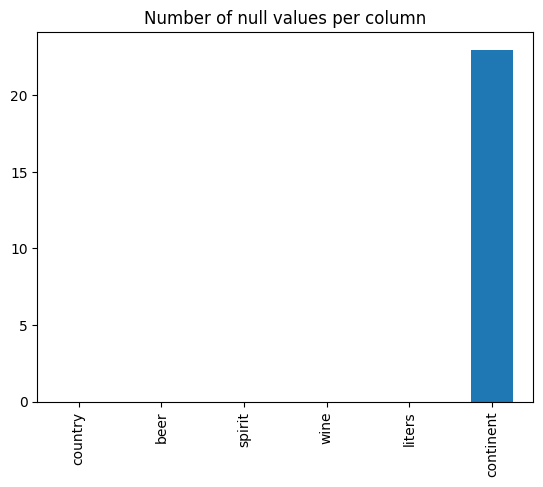

In [87]:
# Count the missing values in each column — remember by default, axis=0.
print((drinks.isnull().sum()))

drinks.isnull().sum().plot(kind='bar')

plt.title('Number of null values per column')

**Dropping Missing Values**

In [88]:
drinks.shape

(193, 6)

In [89]:
# Drop a row if ANY values are missing from any column — can be dangerous!
drinks.dropna()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [90]:
# Drop a row only if ALL values are missing.
drinks.dropna(how='all')

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


**Filling Missing Values**<br>
You may have noticed that the continent North America (NA) does not appear in the `continent` column. Pandas read in the original data and saw "NA", thought it was a missing value, and converted it to a `NaN`, missing value.

In [91]:
# Fill in missing values with "NA" — this is dangerous to do without manually verifying them!
drinks.continent.fillna(value='NA')

0      AS
1      EU
2      AF
3      EU
4      AF
       ..
188    SA
189    AS
190    AS
191    AF
192    AF
Name: continent, Length: 193, dtype: object

In [92]:
# Modifies "drinks" in-place
drinks.continent.fillna(value='NA', inplace=True)

C:\Users\atulp\AppData\Local\Temp\ipykernel_22328\3232506477.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  drinks.continent.fillna(value='NA', inplace=True)


In [93]:
sum(drinks.continent.isnull())

0

<a id="exercise-three"></a>
### Exercise 3


<img src="https://www.dropbox.com/scl/fi/2s9j10tmw3ps899gfajgo/hands_on.jpg?rlkey=53vsb2q2qns4weqkjb0vsvdtz&raw=1" width="100" height="100" align="right"/>

In [94]:
# Read ufo.csv into a DataFrame called "ufo".
ufo = pd.read_csv('ufo.csv')

In [134]:
ufo

                       City ColorsReported ShapeReported State  \
0                    Ithaca            NaN      TRIANGLE    NY   
1               Willingboro            NaN         OTHER    NJ   
2                   Holyoke            NaN          OVAL    CO   
3                   Abilene            NaN          DISK    KS   
4      New York Worlds Fair            NaN         LIGHT    NY   
...                     ...            ...           ...   ...   
80538                Neligh            NaN        CIRCLE    NE   
80539          Uhrichsville            NaN         LIGHT    OH   
80540                Tucson       RED BLUE           NaN    AZ   
80541           Orland park            RED         LIGHT    IL   
80542              Loughman            NaN         LIGHT    FL   

                  Time  
0       6/1/1930 22:00  
1      6/30/1930 20:00  
2      2/15/1931 14:00  
3       6/1/1931 13:00  
4      4/18/1933 19:00  
...                ...  
80538   9/4/2014 23:20  
80539  

In [96]:
# Check the shape of the DataFrame.
ufo.shape

(80543, 5)

In [97]:
# What are the three most common colors reported?
ufo['Colors Reported'].value_counts().sort_values(ascending=False).head(3)

Colors Reported
ORANGE    5216
RED       4809
GREEN     1897
Name: count, dtype: int64

In [98]:
# Rename any columns with spaces so that they don't contain spaces.
ufo.rename(columns={'Colors Reported':'ColorsReported', 'Shape Reported': 'ShapeReported'}, inplace=True)
ufo

,City,ColorsReported,ShapeReported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...,...
80538,Neligh,NaN,CIRCLE,NE,9/4/2014 23:20
80539,Uhrichsville,NaN,LIGHT,OH,9/5/2014 1:14
80540,Tucson,RED BLUE,NaN,AZ,9/5/2014 2:40
80541,Orland park,RED,LIGHT,IL,9/5/2014 3:43


In [135]:
# For reports in VA, what's the most common city?
ufo[ufo['State'] == 'VA']['City'].value_counts().index[0]

'Virginia Beach'

In [100]:
# Print a DataFrame containing only reports from Arlington, VA.
ufo[ufo.City == 'Arlington']

,City,ColorsReported,ShapeReported,State,Time
201,Arlington,NaN,DISK,TX,7/7/1952 13:00
202,Arlington,GREEN,OVAL,VA,7/13/1952 21:00
2945,Arlington,NaN,TRIANGLE,TX,6/23/1975 21:00
2946,Arlington,NaN,TRIANGLE,TX,6/23/1975 21:00
2947,Arlington,NaN,TRIANGLE,TX,6/23/1975 21:00
...,...,...,...,...,...
78082,Arlington,BLUE,FIREBALL,MA,6/7/2014 22:03
79122,Arlington,NaN,CIRCLE,VA,7/7/2014 21:00
79395,Arlington,NaN,TRIANGLE,TX,7/18/2014 23:00
79715,Arlington,BLUE,CIRCLE,TN,8/2/2014 22:00


In [101]:
# Count the number of missing values in each column.
ufo.isna().sum()

City                 51
ColorsReported    63509
ShapeReported      8402
State                 0
Time                  0
dtype: int64

In [102]:
# How many rows remain if you drop all rows with any missing values?
shape_obj = ufo.dropna(how='any')
shape_obj.shape[0], shape_obj.shape[1]

(15509, 5)

<a id="split-apply-combine"></a>
### Split-Apply-Combine

<img src="./images/pandas_tool.jpg" width="300" height="300" align="right"/>

Split-apply-combine is a pattern for analyzing data. Suppose we want to find mean beer consumption per country. Then:

- **Split:** We group data by continent.
- **Apply:** For each group, we apply the `mean()` function to find the average beer consumption.
- **Combine:** We now combine the continent names with the `mean()`s to produce a summary of our findings.

In [136]:
drinks.head(3)

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF


In [104]:
# For each continent, calculate the mean beer servings.
drinks.groupby('continent').beer.mean()   ## SELECT AVG(beer) from drinks groupby continent

continent
AF     61.471698
AS     37.045455
EU    193.777778
NA    145.434783
OC     89.687500
SA    175.083333
Name: beer, dtype: float64

In [105]:
drinks.drop(columns='country').groupby('continent').mean()
# drinks

,beer,spirit,wine,liters
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


In [169]:
# For each continent, calculate the mean of all numeric columns.
# drinks.groupby('continent').mean()
# drinks.info()
# continent_descriptions = drinks.groupby('continent').describe()
# continent_descriptions
# continent_descriptions.drop(columns=['std','min','25%','50%','75%','max'])
numeric_columns = drinks.select_dtypes(include=['int64', 'float64'])
numeric_columns.groupby(drinks['continent']).mean()


,beer,spirit,wine,liters
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


In [107]:
# For each continent, describe beer servings.
drinks.groupby('continent').beer.describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,61.471698,80.557816,0.0,15.00,32.0,76.00,376.0
AS,44.0,37.045455,49.469725,0.0,4.25,17.5,60.50,247.0
EU,45.0,193.777778,99.631569,0.0,127.00,219.0,270.00,361.0
NA,23.0,145.434783,79.621163,1.0,80.00,143.0,198.00,285.0
OC,16.0,89.687500,96.641412,0.0,21.00,52.5,125.75,306.0
SA,12.0,175.083333,65.242845,93.0,129.50,162.5,198.00,333.0


In [138]:
# For each continent, describe all numeric columns.
drinks.groupby('continent').describe().spirit['mean']

continent
AF     16.339623
AS     60.840909
EU    132.555556
NA    165.739130
OC     58.437500
SA    114.750000
Name: mean, dtype: float64

In [139]:
# For each continent, count the number of rows.
print((drinks.continent.value_counts()))   # should be the same

continent
AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: count, dtype: int64


<a id="exercise-four"></a>
### Exercise 4 : TAKE HOME

<img src="./images/hands_on.jpg" width="100" height="100" align="right"/>

Use the "users" `DataFrame` or "users" file in the Data folder to complete the following.

In [110]:
users.head(2)

,user_id,age,gender,occupation,zip_code,boolage,custom_column,is_young
0,1,24,M,technician,85711,False,25,0
1,2,53,F,other,94043,False,55,0


In [141]:
# For each occupation in "users", count the number of occurrences.
users.groupby('occupation').user_id.count()

occupation
administrator     79
artist            28
doctor             7
educator          95
engineer          67
entertainment     18
executive         32
healthcare        16
homemaker          7
lawyer            12
librarian         51
marketing         26
none               9
other            105
programmer        66
retired           14
salesman          12
scientist         31
student          196
technician        27
writer            45
Name: user_id, dtype: int64


In [144]:
# For each occupation, calculate the mean age.
users.groupby('occupation').age.mean()


occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [145]:
# For each occupation, calculate the minimum and maximum ages.
users.groupby('occupation').age.agg(['min', 'max', 'count'])

               min  max  count
occupation                    
administrator   21   70     79
artist          19   48     28
doctor          28   64      7
educator        23   63     95
engineer        22   70     67
entertainment   15   50     18
executive       22   69     32
healthcare      22   62     16
homemaker       20   50      7
lawyer          21   53     12
librarian       23   69     51
marketing       24   55     26
none            11   55      9
other           13   64    105
programmer      20   63     66
retired         51   73     14
salesman        18   66     12
scientist       23   55     31
student          7   42    196
technician      21   55     27
writer          18   60     45


In [147]:
# For each combination of occupation and gender, calculate the mean age.
users.groupby(['occupation', 'gender']).age.agg(['min', 'max'])

min  max
occupation    gender          
administrator F        22   62
              M        21   70
artist        F        19   48
              M        20   45
doctor        M        28   64
educator      F        23   51
              M        25   63
engineer      F        23   36
              M        22   70
entertainment F        24   38
              M        15   50
executive     F        39   49
              M        22   69
healthcare    F        22   53
              M        28   62
homemaker     F        20   50
              M        23   23
lawyer        F        28   51
              M        21   53
librarian     F        26   59
              M        23   69
marketing     F        24   50
              M        24   55
none          F        26   55
              M        11   33
other         F        18   55
              M        13   64
programmer    F        26   38
              M        20   63
retired       F        70   70
              M        51   73
salesman      F        18   33
              M        21   66
scientist     F        26   31
              M        23   55
student       F        13   38
              M         7   42
technician    F        38   38
              M        21   55
writer        F        18   56
              M        21   60

----

<a id="multiple-columns"></a>
## Selecting Multiple Columns and Filtering Rows

In [150]:
ufo.head()

                   City ColorsReported ShapeReported State             Time
0                Ithaca            NaN      TRIANGLE    NY   6/1/1930 22:00
1           Willingboro            NaN         OTHER    NJ  6/30/1930 20:00
2               Holyoke            NaN          OVAL    CO  2/15/1931 14:00
3               Abilene            NaN          DISK    KS   6/1/1931 13:00
4  New York Worlds Fair            NaN         LIGHT    NY  4/18/1933 19:00


In [149]:
# Or, combine into a single step (this is a Python list inside of the Python index operator!).
ufo[['City', 'State']].head()

                   City State
0                Ithaca    NY
1           Willingboro    NJ
2               Holyoke    CO
3               Abilene    KS
4  New York Worlds Fair    NY


**Use `loc` to select columns by name.**

In [159]:
# "loc" locates the values from the first parameter (colon means "all rows"), and the column "City".
ufo.loc[0:5, 'City']

0                  Ithaca
1             Willingboro
2                 Holyoke
3                 Abilene
4    New York Worlds Fair
5             Valley City
Name: City, dtype: object

In [118]:
# Select two columns.
ufo.loc[3:19, ['City', 'State']]

,City,State
3,Abilene,KS
4,New York Worlds Fair,NY
5,Valley City,ND
6,Crater Lake,CA
7,Alma,MI
8,Eklutna,AK
9,Hubbard,OR
10,Fontana,CA
11,Waterloo,AL
12,Belton,SC


In [154]:
# Select a range of columns — unlike Python ranges, Pandas index ranges INCLUDE the final column in the range.
ufo.loc[0:10, 'City':'State']


,City,ColorsReported,ShapeReported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY
5,Valley City,NaN,DISK,ND
6,Crater Lake,NaN,CIRCLE,CA
7,Alma,NaN,DISK,MI
8,Eklutna,NaN,CIGAR,AK
9,Hubbard,NaN,CYLINDER,OR


In [157]:
# "loc" can also filter rows by "name" (the index).
# Row 0, all columns
ufo.loc[0, :]

City                      Ithaca
ColorsReported               NaN
ShapeReported           TRIANGLE
State                         NY
Time              6/1/1930 22:00
Name: 0, dtype: object

In [170]:
# Rows 0/1/2, all columns
ufo.loc[0:2, :]  # ufo.head(3)

,City,ColorsReported,ShapeReported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [122]:
# Rows 0/1/2, range of columns
ufo.loc[0:2, 'City':'State']

,City,ColorsReported,ShapeReported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO


In [180]:
ufo_2 = ufo.set_index(['City', 'State'])
ufo_2

,,ColorsReported,ShapeReported,Time
City,State,,,
Ithaca,NY,NaN,TRIANGLE,6/1/1930 22:00
Willingboro,NJ,NaN,OTHER,6/30/1930 20:00
Holyoke,CO,NaN,OVAL,2/15/1931 14:00
Abilene,KS,NaN,DISK,6/1/1931 13:00
New York Worlds Fair,NY,NaN,LIGHT,4/18/1933 19:00
...,...,...,...,...
Neligh,NE,NaN,CIRCLE,9/4/2014 23:20
Uhrichsville,OH,NaN,LIGHT,9/5/2014 1:14
Tucson,AZ,RED BLUE,NaN,9/5/2014 2:40


In [181]:
ufo_2.loc[('Ithaca', 'NY'),:]

C:\Users\atulp\AppData\Local\Temp\ipykernel_22328\675318746.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  ufo_2.loc[('Ithaca', 'NY'),:]


ColorsReported ShapeReported              Time
City   State                                               
Ithaca NY               NaN      TRIANGLE    6/1/1930 22:00
       NY               NaN         CIGAR    6/1/1979 19:00
       NY               NaN         OTHER    1/10/1993 0:30
       NY         RED GREEN         LIGHT  10/15/1994 18:00
       NY               NaN           NaN   2/16/1996 21:45
       NY               NaN      TEARDROP   7/30/2000 20:20
       NY               NaN        SPHERE    1/16/2001 6:30
       NY               NaN      CYLINDER   1/26/2002 15:30
       NY               NaN         LIGHT    6/7/2002 23:00
       NY               NaN         LIGHT     7/5/2003 0:34
       NY               NaN      FIREBALL   4/19/2004 21:10
       NY               NaN      TRIANGLE   5/11/2004 23:30
       NY               NaN       CHEVRON  10/27/2004 22:20
       NY               NaN      TRIANGLE  10/27/2004 22:30
       NY               NaN          OVAL   6/18/2005 23:50
       NY               RED         LIGHT   12/3/2005 18:00
       NY         RED GREEN        SPHERE   11/6/2006 19:00
       NY          RED BLUE         OTHER   11/12/2010 0:00
       NY            YELLOW     FORMATION   5/29/2011 23:25
       NY               NaN      FIREBALL  10/24/2011 23:00
       NY               NaN      FIREBALL  10/24/2011 23:00
       NY               NaN           NaN   7/29/2012 23:30
       NY               NaN           NaN   9/21/2012 20:47
       NY               NaN     RECTANGLE   9/21/2012 20:48
       NY               NaN      FIREBALL   3/23/2013 19:59
       NY               RED        CIRCLE     5/4/2013 9:45
       NY               NaN         LIGHT    6/3/2013 22:30
       NY            ORANGE      FIREBALL   7/12/2013 21:00

In [189]:
ufo.sort_values('City').index

,City,ColorsReported,ShapeReported,State,Time
51832,((HOAX??)),NaN,CIRCLE,PA,1/20/2010 19:30
54735,((Unspecified location)),NaN,CHEVRON,IL,9/28/2010 19:30
76153,(City not specified),ORANGE,OTHER,MO,2/21/2014 19:45
53001,(above mountains in airplane),NaN,CIRCLE,UT,6/20/2010 15:00
1761,Abbeville,NaN,DISK,SC,12/10/1968 0:30
...,...,...,...,...,...
56676,NaN,NaN,SPHERE,VA,4/4/2011 18:00
60654,NaN,NaN,CYLINDER,PA,12/20/2011 12:00
72502,NaN,NaN,LIGHT,OH,9/12/2013 3:00
72503,NaN,NaN,OVAL,OH,9/12/2013 3:00


## Pandas CheatSheet
https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

<a id="other-features"></a>
### OPTIONAL: Other Commonly Used Features

In [200]:
# Apply an arbitrary function to each value of a Pandas column, storing the result in a new column.
users['under30'] = users.age.apply(lambda age: age < 30)
users


,user_id,age,gender,occupation,zip_code,boolage,custom_column,is_young,under30,under30male,is_male
0,1,24,M,technician,85711,False,25,0,True,True,1
1,2,53,F,other,94043,False,55,0,False,False,0
2,3,23,M,writer,32067,False,26,0,True,True,1
3,4,24,M,technician,43537,False,28,0,True,True,1
4,5,33,F,other,15213,False,38,0,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...
938,939,26,F,student,33319,False,965,0,True,False,0
939,940,32,M,administrator,02215,False,972,0,False,False,1
940,941,20,M,student,97229,False,961,0,True,True,1
941,942,48,F,librarian,78209,False,990,0,False,False,0


In [220]:
# Apply an arbitrary function to each row of a DataFrame, storing the result in a new column.
#  (Remember that, by default, axis=0. Since we want to go row by row, we set axis=1.)
users['under30male'] = users.apply(lambda row: row.age < 30 and row.gender == 'M', axis=1)
users

,user_id,age,gender,occupation,zip_code,boolage,custom_column,is_young,under30,under30male,is_male
0,1,24,M,technician,85711,False,25,0,True,True,1
1,2,53,F,other,94043,False,55,0,False,False,0
2,3,23,M,writer,32067,False,26,0,True,True,1
3,4,24,M,technician,43537,False,28,0,True,True,1
4,5,33,F,other,15213,False,38,0,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...
938,939,26,F,student,33319,False,965,0,True,False,0
939,940,32,M,administrator,02215,False,972,0,False,False,1
940,941,20,M,student,97229,False,961,0,True,True,1
941,942,48,F,librarian,78209,False,990,0,False,False,0


In [245]:
# Map existing values to a different set of values.
users['is_male'] = users.occupation.map({'technician':0, 'other':1})
users

,user_id,age,gender,occupation,zip_code,boolage,custom_column,is_young,under30,under30male,is_male
0,1,24,M,technician,85711,False,25,0,True,True,0.0
1,2,53,F,other,94043,False,55,0,False,False,1.0
2,3,23,M,writer,32067,False,26,0,True,True,NaN
3,4,24,M,technician,43537,False,28,0,True,True,0.0
4,5,33,F,other,15213,False,38,0,False,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...
938,939,26,F,student,33319,False,965,0,True,False,NaN
939,940,32,M,administrator,02215,False,972,0,False,False,NaN
940,941,20,M,student,97229,False,961,0,True,True,NaN
941,942,48,F,librarian,78209,False,990,0,False,False,NaN


In [236]:
# Replace all instances of a value in a column (must match entire value).
ufo.State.replace('Fl', 'FL', inplace=True)

C:\Users\atulp\AppData\Local\Temp\ipykernel_22328\2246729111.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ufo.State.replace('Fl', 'FL', inplace=True)


In [235]:
ufo

,City,ColorsReported,ShapeReported,State,Time
0,Ithaca,NaN,TRIANGLE,None,6/1/1930 22:00
1,Willingboro,NaN,OTHER,None,6/30/1930 20:00
2,Holyoke,NaN,OVAL,None,2/15/1931 14:00
3,Abilene,NaN,DISK,None,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,None,4/18/1933 19:00
...,...,...,...,...,...
80538,Neligh,NaN,CIRCLE,None,9/4/2014 23:20
80539,Uhrichsville,NaN,LIGHT,None,9/5/2014 1:14
80540,Tucson,RED BLUE,NaN,None,9/5/2014 2:40
80541,Orland park,RED,LIGHT,None,9/5/2014 3:43


In [238]:
# String methods are accessed via "str".
ufo.State.str.upper()                               # Converts to upper case
# checks for a substring
ufo['ColorsReported'].str.contains('RED', na='False')

0        False
1        False
2        False
3        False
4        False
         ...  
80538    False
80539    False
80540     True
80541     True
80542    False
Name: ColorsReported, Length: 80543, dtype: object

In [241]:
# Convert a string to the datetime format (this is often slow — consider doing it in the "read_csv()" method.)
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo.Time.dt.hour                        # Datetime format exposes convenient attributes
(ufo.Time.max() - ufo.Time.min()).days  # Also allows you to do datetime "math"

30776

In [270]:
# Set and then remove an index.
ufo.set_index('Time', inplace=True)
ufo.reset_index(inplace=True)
ufo

,Time,level_0,index,City,ColorsReported,ShapeReported,State
0,1930-06-01 22:00:00,0,0,Ithaca,NaN,TRIANGLE,None
1,1930-06-30 20:00:00,1,1,Willingboro,NaN,OTHER,None
2,1931-02-15 14:00:00,2,2,Holyoke,NaN,OVAL,None
3,1931-06-01 13:00:00,3,3,Abilene,NaN,DISK,None
4,1933-04-18 19:00:00,4,4,New York Worlds Fair,NaN,LIGHT,None
...,...,...,...,...,...,...,...
80538,2014-09-04 23:20:00,80538,80538,Neligh,NaN,CIRCLE,None
80539,2014-09-05 01:14:00,80539,80539,Uhrichsville,NaN,LIGHT,None
80540,2014-09-05 02:40:00,80540,80540,Tucson,RED BLUE,NaN,None
80541,2014-09-05 03:43:00,80541,80541,Orland park,RED,LIGHT,None


In [272]:
# Change the datatype of a column.
drinks['beer'] = drinks.beer.astype('float')
drinks

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0.0,0,0,0.0,AS
1,Albania,89.0,132,54,4.9,EU
2,Algeria,25.0,0,14,0.7,AF
3,Andorra,245.0,138,312,12.4,EU
4,Angola,217.0,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333.0,100,3,7.7,SA
189,Vietnam,111.0,2,1,2.0,AS
190,Yemen,6.0,0,0,0.1,AS
191,Zambia,32.0,19,4,2.5,AF


In [311]:
# Create dummy variables for "continent" and exclude first dummy column.
drinks

continent_dummies = pd.get_dummies(drinks[['continent']], prefix='dummmy').iloc[:, 1:]

continent_dummies
# drinks

,dummmy_AS,dummmy_EU,dummmy_NA,dummmy_OC,dummmy_SA
0,True,False,False,False,False
1,False,True,False,False,False
2,False,False,False,False,False
3,False,True,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
188,False,False,False,False,True
189,True,False,False,False,False
190,True,False,False,False,False
191,False,False,False,False,False


In [314]:
# Concatenate two DataFrames (axis=0 for rows, axis=1 for columns).
drinks = pd.concat([drinks, continent_dummies], axis=1)
drinks

,country,beer,spirit,wine,liters,continent,dummmy_AS,dummmy_EU,dummmy_NA,dummmy_OC,dummmy_SA,dummmy_AS,dummmy_EU,dummmy_NA,dummmy_OC,dummmy_SA
0,Afghanistan,0.0,0,0,0.0,AS,True,False,False,False,False,True,False,False,False,False
1,Albania,89.0,132,54,4.9,EU,False,True,False,False,False,False,True,False,False,False
2,Algeria,25.0,0,14,0.7,AF,False,False,False,False,False,False,False,False,False,False
3,Andorra,245.0,138,312,12.4,EU,False,True,False,False,False,False,True,False,False,False
4,Angola,217.0,57,45,5.9,AF,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venezuela,333.0,100,3,7.7,SA,False,False,False,False,True,False,False,False,False,True
189,Vietnam,111.0,2,1,2.0,AS,True,False,False,False,False,True,False,False,False,False
190,Yemen,6.0,0,0,0.1,AS,True,False,False,False,False,True,False,False,False,False
191,Zambia,32.0,19,4,2.5,AF,False,False,False,False,False,False,False,False,False,False


<a id="uncommon-features"></a>
### OPTIONAL: Other Less-Used Features of Pandas

In [323]:
# Detecting duplicate rows
users.duplicated()          # True if a row is identical to a previous row
users.duplicated().sum()    # Count of duplicates
users[users.duplicated()]   # Only show duplicates
users.drop_duplicates()     # Drop duplicate rows
users.age.duplicated()      # Check a single column for duplicates
users.duplicated(['age', 'gender', 'zip_code']).sum()   # Specify columns for finding duplicates

13

In [335]:
# Convert a range of values into descriptive groups.
drinks['beer_level'] = 'low'    # Initially set all values to "low"
drinks.loc[drinks.beer.between(101, 200), 'beer_level'] = 'med'     # Change 101-200 to "med"
drinks.loc[drinks.beer.between(201, 400), 'beer_level'] = 'high'    # Change 201-400 to "high"
drinks.head()

str

In [330]:
# Display a cross-tabulation of two Series.
pd.crosstab(drinks.continent, drinks.beer_level)

beer_level,high,low,med
continent,,,
AF,4,45,4
AS,1,40,3
EU,24,9,12
NA,5,8,10
OC,3,11,2
SA,3,1,8


In [336]:
# Convert "beer_level" into the "category" datatype.
drinks['beer_level'] = pd.Categorical(drinks.beer_level, categories=['low', 'med', 'high'])
drinks.sort_values('beer_level')   # Sorts by the categorical ordering (low to high)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   country     193 non-null    object  
 1   beer        193 non-null    float64 
 2   spirit      193 non-null    int64   
 3   wine        193 non-null    int64   
 4   liters      193 non-null    float64 
 5   continent   193 non-null    object  
 6   dummmy_AS   193 non-null    bool    
 7   dummmy_EU   193 non-null    bool    
 8   dummmy_NA   193 non-null    bool    
 9   dummmy_OC   193 non-null    bool    
 10  dummmy_SA   193 non-null    bool    
 11  dummmy_AS   193 non-null    bool    
 12  dummmy_EU   193 non-null    bool    
 13  dummmy_NA   193 non-null    bool    
 14  dummmy_OC   193 non-null    bool    
 15  dummmy_SA   193 non-null    bool    
 16  beer_level  193 non-null    category
dtypes: bool(10), category(1), float64(2), int64(2), object(2)
memory usage: 11.4+ KB


In [ ]:
# Limit which rows are read when reading in a file — useful for large files!
pd.read_csv('./data/drinks.csv', nrows=10)           # Only read first 10 rows
pd.read_csv('./data/drinks.csv', skiprows=[1, 2])    # Skip the first two rows of data

In [ ]:
# Write a DataFrame out to a .csv
drinks.to_csv('drinks_updated.csv')                 # Index is used as first column
drinks.to_csv('drinks_updated.csv', index=False)    # Ignore index

In [353]:
# Create a DataFrame from a dictionary.
pd.DataFrame({'capital':['Montgomery', 'Juneau', 'Phoenix'], 'state':['AL', 'AK', 'AZ']})

,capital,state
0,Montgomery,AL
1,Juneau,AK
2,Phoenix,AZ


In [354]:
# Create a DataFrame from a list of lists.
pd.DataFrame([['Montgomery', 'AL'], ['Juneau', 'AK'], ['Phoenix', 'AZ']], columns=['capital', 'state'])

,capital,state
0,Montgomery,AL
1,Juneau,AK
2,Phoenix,AZ


In [350]:
# Randomly sample a DataFrame.
import numpy as nps
mask = np.random.rand(len(drinks)) < 0.66   # Create a Series of Booleans
train = drinks[mask]                        # Will contain around 66% of the rows
test = drinks[~mask]                        # Will contain the remaining rows
print(train.shape)
print(test.shape)

(130, 17)
(63, 17)


In [359]:
# Change the maximum number of rows and columns printed ('None' means unlimited).
pd.options.display.max_rows = None     # Default is 60 rows
pd.options.display.max_columns = None    # Default is 20 columns

In [357]:
# Reset options to defaults.
pd.reset_option('max_rows')
pd.reset_option('max_columns')

<a id="summary"></a>
### Summary

Believe it or not, we've only barely touched the surface of everything that Pandas offers. Don't worry if you don't remember most of it — for now, just knowing what exists is key. Remember that the more you use Pandas to manipulate data, the more of these functions you will take interest in, look up, and remember.

In this notebook, the most important things to familiarize yourself with are the basics:
- Manipulating `DataFrames` and `Series`
- Filtering columns and rows
- Handling missing values
- Split-apply-combine (this one takes some practice!)